# Introduction
We have opted to analyze the "World Happiness Report 2019" dataset available on Kaggle. This dataset comprises various variables that determine the happiness rank and score of countries across the globe. The happiness rank is based on the highest score, with the first rank indicating the best performance. The variables considered in the dataset are as follows:

* Rank: Rank of Countries
* Score : A metric measured by asking the sampled people the question: "How would you rate your happiness a scale of 0 to 10 where 10 is the happiest?"
* GDP per capita (Economy) : The extent to which GDP contributes to the calculation of the Happiness Score.
* Social support (Family) : The extent to which Family contributes to the calculation of the Happiness Score.
* Healthy life expectancy (Health) : The extent to which Life expectancy contributed to the calculation of the Happiness Score.
* Freedom to make life choices (Freedom) : The extent to which Freedom contributed to the calculation of the Happiness Score.
* Perceptions of corruption (Trust) : The extent to which Perception of Corruption contributes to Happiness Score.
* Generosity : The extent to which Generosity contributes to Happiness Score.


Our report is structured into three main sections:

* Cleaning and Manipulating
* Visualization
* Prediction


# Purpose
The primary purpose of this Notebook is to gain a better understanding of the data and extract insights that can help answer important questions. At the end of this we can identify patterns and relationships between different variables, detect outliers and anomalies, assess data quality, test assumptions, and communicate findings effectively to others. By doing so, we can understand how factors such as Economy, Family, Health, Freedom, Trust, and Generosity can impact a country's happiness score, and gain valuable insights that can help us better understand the factors that impact happiness.

# Cleaning and Manipulating 
In this section the following will be performed:
* Importing Libraries and Data
* Viewing Data
* Check for missing Data
* Organizing Contry or Region into Continent Category
* Check for Missing Data After Manipulating
* Check for Duplicates

In [1]:
# Importing Libraries and Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/world-happiness/2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/world-happiness/2019.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Viewing Data
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [5]:
# Check for missing data
missing_data = df.isnull().sum()

# Print the result
print(missing_data)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
# Organizing Contry or Region into Continent Category 
continent_dict = { 
    'Asia': ['Afghanistan', 'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen','Taiwan', 'Singapore', 'Uzbekistan', 'Thailand', 'South Korea', 'Japan', 'Philippines', 'Tajikistan', 'Hong Kong', 'Malaysia', 'Mongolia', 'Kyrgyzstan', 'Turkmenistan', 'Azerbaijan', 'Indonesia', 'China', 'Vietnam', 'Bhutan', 'Nepal', 'Laos', 'Cambodia', 'Palestinian Territories', 'Armenia', 'Georgia', 'Bangladesh', 'Sri Lanka', 'Myanmar', 'India'],
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)','Congo (Kinshasa)', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau','Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan','Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Trinidad & Tobago', 'Uruguay', 'Venezuela'],
    'Europe': ['Albania', 'Andorra', 'Austria','Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece','Georgia', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands','Northern Cyprus', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
    }

In [8]:
df['Continent'] = df['Country or region'].apply(lambda x: next((k for k in continent_dict if x in continent_dict[k]), None))
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [9]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Africa
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Africa


In [10]:
# Check for missing data
missing_data = df.isnull().sum()

# Print the result
print(missing_data)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Continent                       0
dtype: int64


In [11]:
# Check for duplicates
duplicates = df[df.duplicated()]

# Print the duplicates
print(duplicates)

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Continent]
Index: []


In [12]:
df = df.sort_values('Continent')

# Visualization
To gain insight into the distribution of happiness scores in different continents and how this score is distributed across continents, we will employ several useful exploratory data analysis techniques, including scatter plots, box plots, and violin plots. These tools will enable us to visualize the data in ways that will allow us to easily identify patterns and trends, as well as detect outliers and anomalies that may require further investigation. Furthermore, we will also calculate the mean and median happiness score for each continent to gain a better understanding of how the score is populated across the globe. By utilizing these methods, we will be able to generate valuable insights that can inform policy decisions, aid research, and help us better understand the factors that impact happiness.


In [13]:
# Create a Scatter plot
fig_box = px.scatter(df, x='Continent', y='Score', color='Continent',
                 title='Happiness Scores by Continent (Scatter Plot)',
                 labels={'Continent': 'Continent', 'Score': 'Happiness Score'})
fig_box.show()
# Create a box plot
fig_box = px.box(df, x='Continent', y='Score', color='Continent',
                 title='Happiness Scores by Continent (Box Plot)',
                 labels={'Continent': 'Continent', 'Score': 'Happiness Score'})
fig_box.show()

# Create a violin plot
fig_violin = px.violin(df, x='Continent', y='Score', color='Continent',
                       title='Happiness Scores by Continent (Violin Plot)',
                       labels={'Continent': 'Continent', 'Score': 'Happiness Score'})
fig_violin.show()

In [14]:
# Group the data by continent and calculate the mean and median scores
grouped = df.groupby('Continent')['Score']
mean_scores = grouped.mean()
median_scores = grouped.median()

# Print the results
print('Mean scores by continent:')
print(mean_scores)
print('\nMedian scores by continent:')
print(median_scores)

Mean scores by continent:
Continent
Africa           4.368289
Asia             5.224442
Europe           6.245000
North America    6.151583
Oceania          7.267500
South America    5.944909
Name: Score, dtype: float64

Median scores by continent:
Continent
Africa           4.4610
Asia             5.2080
Europe           6.1180
North America    6.2870
Oceania          7.2675
South America    6.0860
Name: Score, dtype: float64


***Mean and Median***

Highest: Oceania has the highest mean happiness score among all continents in the dataset, it means that on average, countries in Oceania tend to have higher happiness scores than countries in other continents.

Lowest: Africa has the lowest mean happiness score among all continents in the dataset, it means that on average, countries in Africa tend to have Lower happiness scores than countries in other continents.

    However, it's important to note that the mean happiness score for a continent does not provide a complete picture of the happiness level of individual countries within that continent. There may be some countries that have lower happiness scores than the mean, and conversely, there may be some countries in other continents that have higher happiness scores than their respective means. Therefore, it's important to analyze the data at the country level as well to get a more accurate understanding of the happiness levels within each continent.

    The median can be a useful statistic to consider alongside the mean because it is not as sensitive to outliers as the mean. In other words, if there are a few countries with very high or very low happiness scores, the median may be a more representative measure of central tendency than the mean.

***Distribution Skews***
* Africa : Negatively skewed 
* Asian : Positively skewed 
* Europe : Positively skewed 
* North America : Negatively skewed 
* Oceania : Evenly skewed 
* South America : Negatively skewed

***Scatter Plots***

A scatter plot is a powerful exploratory data analysis tool that allows us to visually examine the relationship between two variables in a dataset. In the context of a dataset containing happiness scores and other factors for different countries, a scatter plot can be used to investigate the correlation between happiness scores and other variables for each continent separately.

Each point on the scatter plot represents a country, with the horizontal axis representing the value of one variable (e.g. GDP per capita) and the vertical axis representing the value of the happiness score. By plotting the values of these two variables for each country in a continent, we can visually identify any patterns or relationships between them.

A strong positive correlation between two variables would result in a clear upward trend in the scatter plot, indicating that as the value of one variable increases, the value of the other variable also tends to increase. A strong negative correlation would result in a clear downward trend, indicating that as the value of one variable increases, the value of the other variable tends to decrease.

In addition, scatter plots can help us identify any outliers or anomalies in the data that may require further investigation. For example, if there is a country with a very high GDP per capita but a low happiness score, this may suggest that there are other factors that are more important in determining happiness than just income.

Overall, by using scatter plots to examine the relationship between happiness scores and other variables for each continent separately, we can gain valuable insights into the factors that contribute to happiness in different parts of the world.


In [15]:
# Create scatter plots with regression lines for each continent
scatter_plots = px.scatter(df, x="Score", y="GDP per capita", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_layout(title_text='GDP per capita vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

scatter_plots = px.scatter(df, x="Score", y="Social support", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_layout(title_text='Social support vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

scatter_plots = px.scatter(df, x="Score", y="Healthy life expectancy", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.update_layout(title_text='Healthy life expectancy vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

scatter_plots = px.scatter(df, x="Score", y="Freedom to make life choices", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.update_layout(title_text='Freedom to make life choices vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

scatter_plots = px.scatter(df, x="Score", y="Generosity", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_layout(title_text='Generosity vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

scatter_plots = px.scatter(df, x="Score", y="Perceptions of corruption", color="Continent", trendline="ols", facet_col="Continent")
scatter_plots.update_layout(title_text='Perceptions of corruption vs. Happiness Score', xaxis_title='Happiness Score')
scatter_plots.update_xaxes(title='Happiness Score')
scatter_plots.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))
scatter_plots.show()

***Correlation Heat Map***

A correlation heatmap is a data visualization tool that uses color coding to represent the correlation coefficients between multiple variables in a dataset. Each cell in the heatmap represents the correlation between two variables, with the color indicating the strength and direction of the correlation.

Unlike scatter plots, which can only show the relationship between two variables at a time, a correlation heatmap can show the relationships between multiple variables simultaneously. This makes it a more efficient and effective way to visualize correlations between multiple variables in a dataset.

In [16]:
# Convert the categorical variable 'Continent' to a numeric variable
df['Continent'] = pd.factorize(df['Continent'])[0]

In [17]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,0
127,128,Mali,4.390,0.385,1.105,0.308,0.327,0.153,0.052,0
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,0
95,96,Cameroon,5.044,0.549,0.910,0.331,0.381,0.187,0.037,0
123,124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,0


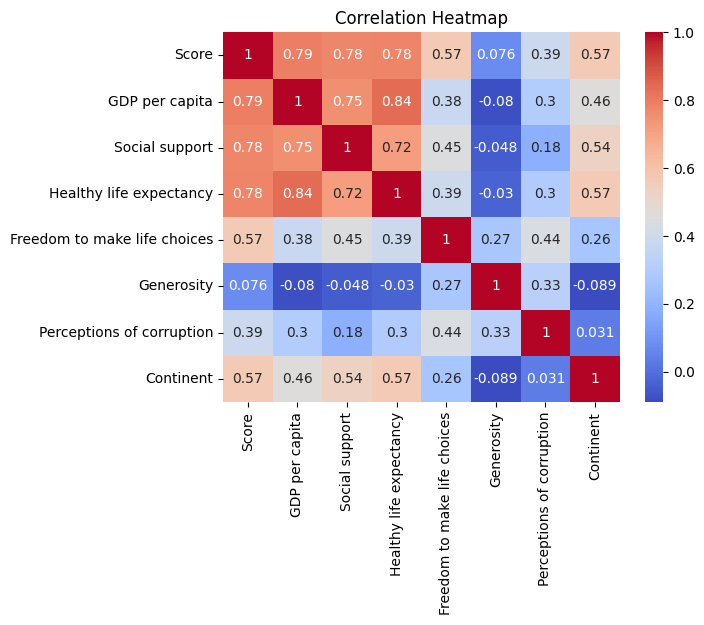

In [18]:
# Drop the 'Overall rank' column 
# Since Rank and Happiness Score is negatively correlated by nature
dfcor = df.drop(columns=['Overall rank'])

# Compute the correlation matrix for numeric columns
corr_matrix = dfcor.corr(numeric_only=True)

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

***Correlation Insights in regards to Score***

Strong Correlation

* GDP per capita : .79
* Socia support : .78
* Healthy life expectancy : .78

Weak Correlation

* Perceptions of corruption : .39
* Generosity : .076

***Prediction***

Multiple linear regression is a type of linear regression that involves modeling the relationship between a dependent variable and two or more independent variables. In other words, it is used to predict the value of a dependent variable based on the values of two or more independent variables. Multiple linear regression assumes that there is a linear relationship between the dependent variable and the independent variables, and it estimates the coefficients of the independent variables that best fit the data. These coefficients can be used to make predictions about the dependent variable for new data points.

Random forest tree is a type of ensemble learning method that involves building multiple decision trees and combining their predictions to make a final prediction. Each decision tree is built on a subset of the training data, and it uses a random subset of the features to make decisions at each node. This helps to reduce overfitting and improve the accuracy of the final prediction. Random forest tree can be used for both regression and classification tasks, and it is often used in applications where there are many input variables.

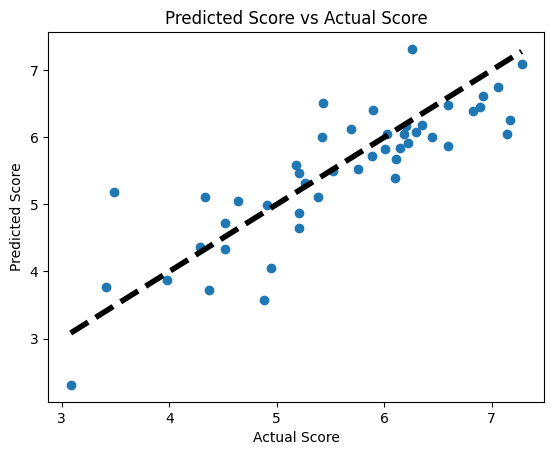

Linear Regression Model Summary
------------------
Intercept: 1.8349946915936735
GDP per capita : 0.7661585778522869
Social support : 1.1863622056730363
Healthy life expectancy : 0.7163318861039267
Freedom to make life choices : 1.3443592176202892
Generosity : 0.04353160610528151
Perceptions of corruption : 1.9075898211422466
Continent : 0.10019461260483209
------------------
R-squared: 0.6866968894216614
------------------


In [19]:

# Split the data into training and testing sets
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Continent']]
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Calculate the R-squared value of the model
r2 = r2_score(y_test, y_pred)

# Plot the predicted score against the actual score
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()

# Print a summary of the linear regression model
print('Linear Regression Model Summary')
print('------------------')
print('Intercept:', model.intercept_)
for i, col in enumerate(X.columns):
    print(col, ':', model.coef_[i])
print('------------------')
print('R-squared:', r2)
print('------------------')

***Insights***

In this case, an R-squared value of 0.6866968894216614 indicates that the independent variables collectively explain 68.67% of the variance in the dependent variable, which is a relatively high value. The model has a moderate-to-strong predictive power, and the independent variables included in the model are significant in explaining the variation in happiness score.

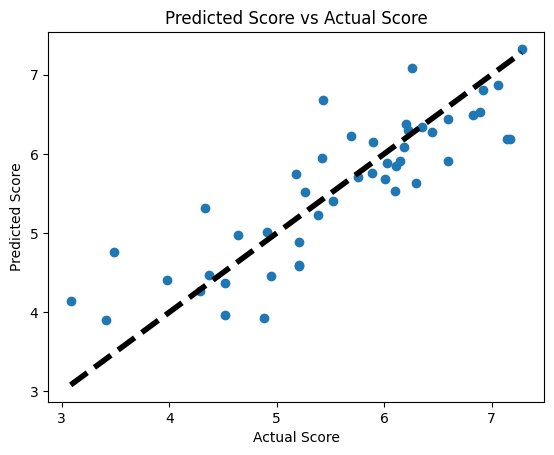

Random Forest Model Summary
------------------
GDP per capita : 0.2932846719730115
Social support : 0.41321162558831354
Healthy life expectancy : 0.10044569513907625
Freedom to make life choices : 0.06543216232052382
Generosity : 0.02581481177528872
Perceptions of corruption : 0.06156777952100554
Continent : 0.04024325368278057
------------------
R-squared: 0.7253486465140864
------------------


In [20]:
# Split the data into training and testing sets
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Continent']]
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest model and fit it to the training data
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Calculate the R-squared value of the model
r2 = r2_score(y_test, y_pred)

# Plot the predicted score against the actual score
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Predicted Score vs Actual Score')
plt.show()

# Print a summary of the random forest model
print('Random Forest Model Summary')
print('------------------')
for i, col in enumerate(X.columns):
    print(col, ':', model.feature_importances_[i])
print('------------------')
print('R-squared:', r2)
print('------------------')

***Insights***

An R-squared value of 0.7253486465140864 indicates that the model is able to explain 72.53% of the variance in the happiness score based on the independent variables. The random forest regression model has a relatively strong predictive power, and the independent variables included in the model are significant in explaining the variation in happiness score.

# Summary

This EDA and predictive analysis provided valuable insights into the factors that contribute to happiness scores in different countries and continents. It revealed strong positive correlations between GDP per capita, social support, and healthy life expectancy and happiness scores, indicating that these factors are important in promoting happiness. In contrast, perceptions of corruption and generosity showed weak positive correlations with happiness scores, suggesting that these factors may have a lesser impact on overall happiness levels.

The analysis also showed that Oceania had the highest mean and median happiness scores among all continents, indicating that the variables included in the analysis, such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, perceptions of corruption, and generosity, may interact in unique ways in this region to promote higher levels of happiness.

However, it is important to note that the R-squared values for the predictive models used, linear regression and random forest regression, were not particularly high (0.687 and 0.725, respectively). This suggests that while the models can be useful in making predictions, they should be used with caution and that other factors not included in the analysis may also have an impact on happiness scores.

Overall, this analysis highlights the importance of understanding the factors that contribute to happiness and their relationship with each other, as well as the limitations of predictive models in accurately forecasting happiness levels.
